In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
os.chdir('/Users/rraj/PythonFunctions/DCNet/')
os.getcwd()

'/Users/rraj/PythonFunctions/DCNet'

In [2]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from tqdm import tqdm

mnist_data = MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.ToTensor(), 
    download = True,            
)


In [3]:
from initialization import Initializer
from layers import DiscriminationModule, ClassificationModule
from metrics import Conncetedness

initializer = Initializer(mnist_data, num_classes=10)
#weights = mnsit_initialization.weights(out_dim=500)
metric = Conncetedness()


In [4]:
self_connectedness_multi = []
train_size = 5000
for trials in range(1):
    self_connectedness = []
    data_loader = initializer.loader(train_size)
    metric.reset()

    module_d = DiscriminationModule(500, initializer)
    module_c = ClassificationModule(500, initializer)

    for i, x in tqdm(enumerate(data_loader), total=train_size):
        y_ = module_d(x)
        module_c(y_)

            #module_d.organize() if i > 0 and i%50 == 0 else None 
            #module_c.organize() if i > 0 and i%200 == 0 else None
        if i > 0 and i%200 == 0:
            module_d.organize()
            module_c.organize()
            metric.update(module_c.connections, module_d.labels)
            self_connectedness.append(metric.compute())
                
    self_connectedness_multi.append(self_connectedness)
    #plt.plot(self_connectedness, label=str(0.1*p))
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
#plt.plot(self_connectedness)

100%|██████████| 5000/5000 [13:31<00:00,  6.16it/s]


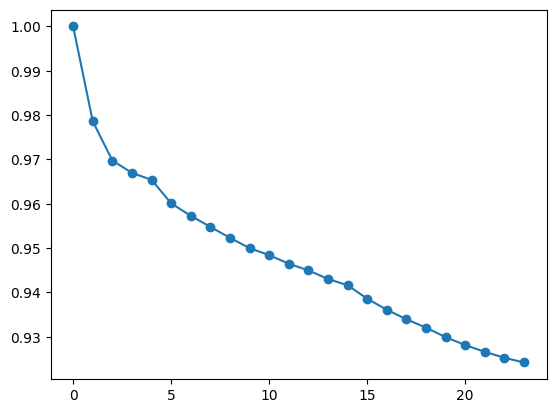

In [5]:
plt.plot(self_connectedness_multi[0], "o-")

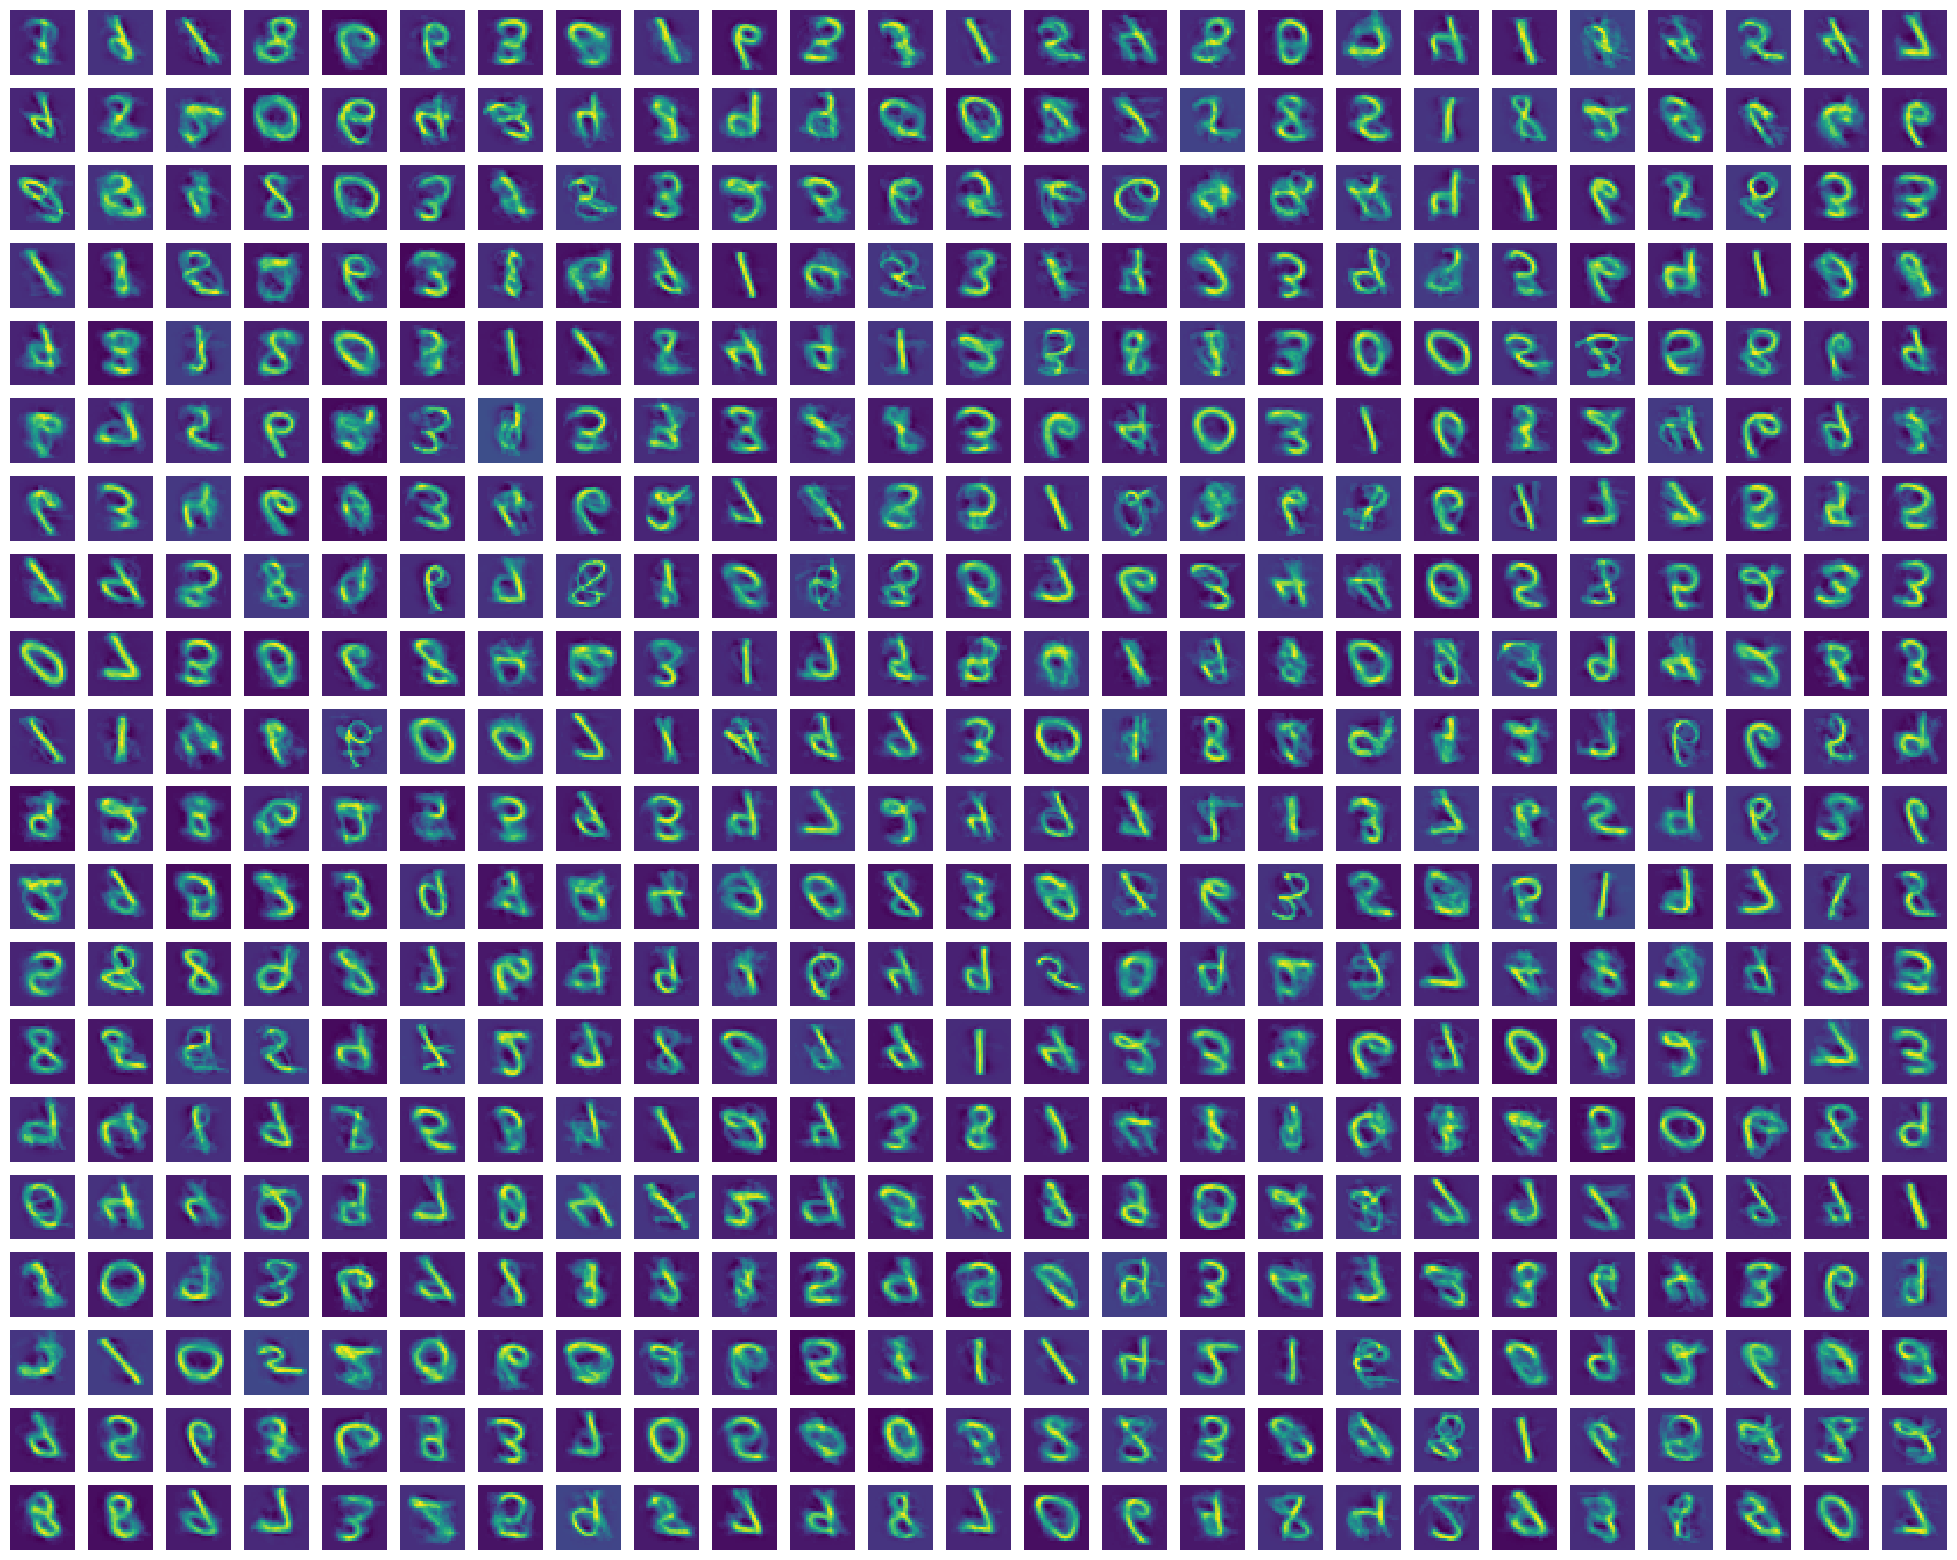

In [6]:
from plotting import plot_connections, plot_clusters
plot_connections(module_d.connections[:784,:])

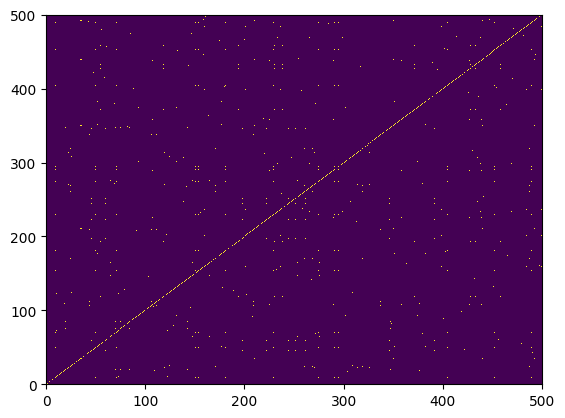

In [7]:
plt.pcolormesh(module_c.connections)